# Extract Food Information

API Response:
 The image contains a plate of lapis legit, a traditional Indonesian layer cake. The cake is made from layers of yellow and green batter, and is typically served in slices. The main ingredients in lapis legit are flour, sugar, eggs, and butter. The cake is often flavored with vanilla or pandan extract. This particular image shows a portion of lapis legit that has been cut into 5 slices.


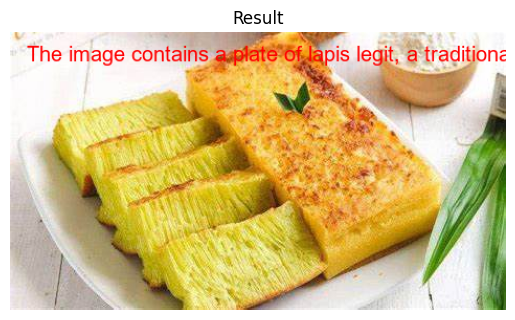

In [1]:
import requests
import base64
import json
from PIL import Image, ImageDraw, ImageFont  
import matplotlib.pyplot as plt
from dotenv import load_dotenv 
import os  

load_dotenv()

def encode_image_to_base64(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode('utf-8')

image_path = "images/OIP.jpg"

base64_image = encode_image_to_base64(image_path)

url = "https://openrouter.ai/api/v1/chat/completions"

headers = {
    "Authorization": "Bearer " + os.getenv("API_KEY"),  # Ambil API key dari .env
    "Content-Type": "application/json",
}

data = {
    "model": "google/gemini-pro-vision", 
    "messages": [
        {
            "role": "user",
            "content": [
                {
                    "type": "text",
                    "text": "Extract only the food-related information from this image. Focus on identifying the main ingredients, portion size, and any other relevant details about the food."
                },
                {
                    "type": "image_url",
                    "image_url": {
                        "url": f"data:image/jpeg;base64,{base64_image}"  
                    }
                }
            ]
        }
    ],
}

response = requests.post(
    url=url,
    headers=headers,
    data=json.dumps(data)
)

if response.status_code == 200:
    result = response.json()
    api_response = result["choices"][0]["message"]["content"]
    print("API Response:")
    print(api_response)
else:
    print(f"Error: {response.status_code}")
    print(response.text)
    api_response = "Error: Unable to fetch API response."

def add_text_to_image(image_path, text):
    
    img = Image.open(image_path)

    draw = ImageDraw.Draw(img)

    try:
        font = ImageFont.truetype("arial.ttf", 20)  
    except IOError:
        font = ImageFont.load_default()  

    text_position = (10, 10)
    
    draw.text(text_position, text, fill="red", font=font)

    return img

img_with_text = add_text_to_image(image_path, api_response)

plt.imshow(img_with_text)
plt.axis('off') 
plt.title("Result")
plt.show()

In [5]:
import requests
import json
from dotenv import load_dotenv
import os

# Load environment variables from .env file
load_dotenv()

# Function to send a request to Mistral AI model for nutrition extraction
def extract_nutrition_info(text):
    url = "https://openrouter.ai/api/v1/chat/completions"
    headers = {
        "Authorization": "Bearer " + os.getenv("API_KEY"),  # Get API key from .env
        "Content-Type": "application/json",
    }
    data = {
        "model": "mistralai/mistral-small-24b-instruct-2501",
        "messages": [
            {
                "role": "user",
                "content": f"Give me nutrition information from the given image extraction: {text}"
            }
        ],
    }
    response = requests.post(
        url=url,
        headers=headers,
        data=json.dumps(data)
    )
    if response.status_code == 200:
        result = response.json()
        nutrition_info = result["choices"][0]["message"]["content"]
        return nutrition_info
    else:
        print(f"Error: {response.status_code}")
        print(response.text)
        return "Error: Unable to fetch nutrition information."


nutrition_info = extract_nutrition_info(api_response)
# Print the nutrition information
print("Nutrition Information:")
print(nutrition_info)

Nutrition Information:
Based on the information provided, here's an approximate nutrition breakdown for one slice of lapis legit, given the typical ingredients and the fact that the cake is divided into 5 slices. Note that this is an estimate, as the exact nutrition content can vary based on the specific recipe and portion sizes. I recommend checking a specific recipe or using a nutritional calculator if you need precise nutrition information.

### Estimated Nutrition Information per Slice (1/5 of the cake):

1. **Carbohydrates:**
   - From flour: Approximately 15-20 grams
   - From sugar: Approximately 20-25 grams
   - **Total Carbohydrates:** Approximately 35-45 grams

2. **Fats:**
   - From butter: Approximately 10-12 grams

3. **Protein:**
   - From eggs and flour: Approximately 3-5 grams

4. **Calories:**
   - Based on the above, a rough estimate might be around 250-300 calories per slice.

5. **Other Considerations:**
   - Flavorings such as vanilla or pandan extract add minimal 